## Installing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [ ]:
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

## Exploratory Data Analysis (EDA) and Pre-Processing

In [ ]:

matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
matches.shape,deliveries.shape

((756, 18), (179078, 21))

In [ ]:
deliveries.head(15)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [ ]:
deliveries[deliveries['match_id']==2]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
248,2,1,Mumbai Indians,Rising Pune Supergiant,1,1,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
249,2,1,Mumbai Indians,Rising Pune Supergiant,1,2,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
250,2,1,Mumbai Indians,Rising Pune Supergiant,1,3,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
251,2,1,Mumbai Indians,Rising Pune Supergiant,1,4,JC Buttler,PA Patel,AB Dinda,0,...,0,0,0,0,5,0,5,NaN,NaN,NaN
252,2,1,Mumbai Indians,Rising Pune Supergiant,1,5,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2,2,Rising Pune Supergiant,Mumbai Indians,20,1,MS Dhoni,SPD Smith,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
491,2,2,Rising Pune Supergiant,Mumbai Indians,20,2,SPD Smith,MS Dhoni,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
492,2,2,Rising Pune Supergiant,Mumbai Indians,20,3,MS Dhoni,SPD Smith,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
493,2,2,Rising Pune Supergiant,Mumbai Indians,20,4,SPD Smith,MS Dhoni,KA Pollard,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [ ]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
# grouping the 1st innings,2nd innings score in a particular matchid
totalrun_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

totalrun_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [ ]:
# capturing only the first innings,as we will be predicting for the second innnigs

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)
totalrun_df

<ipython-input-11-be2a3773d1fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)


,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [ ]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
#merging dfs
match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                       left_on='id',right_on='match_id')

match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
match_df.shape


(756, 20)

In [ ]:
match_df[match_df['dl_applied']==1].style.background_gradient(cmap = 'plasma')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129
99,100,IPL-2008,Delhi,17-05-2008,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,119
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,150
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,105
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,159
148,149,IPL-2009,Centurion,07-05-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,186
251,252,IPL-2011,Kochi,18-04-2011,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,normal,1,Kochi Tuskers Kerala,0,7,BB McCullum,Nehru Stadium,K Hariharan,AL Hill,nan,252,132
280,281,IPL-2011,Kolkata,07-05-2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,115
290,291,IPL-2011,Bangalore,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,90
488,489,IPL-2014,Delhi,10-05-2014,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,nan,489,144


In [ ]:
# ignoring the rows which were DL method

match_df = match_df[match_df['dl_applied']==0]

# considering the match_id,city,winner and total runs

match_df = match_df[['match_id','city','winner','total_runs']]

match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
1,2,Pune,Rising Pune Supergiant,185
2,3,Rajkot,Kolkata Knight Riders,184
3,4,Indore,Kings XI Punjab,164
4,5,Bangalore,Royal Challengers Bangalore,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [ ]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
# merging matchdf with delevieries on match_id

delivery_df = match_df.merge(deliveries,on='match_id')

delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df.head(15)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,11
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,0,0,NaN,NaN,NaN,11
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,0,0,0,NaN,NaN,NaN,11
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,12
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,12


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201


In [ ]:
#balls left
delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
175866,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
175867,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
175868,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [ ]:
list(delivery_df['player_dismissed'].unique())

[nan,
 'Mandeep Singh',
 'CH Gayle',
 'KM Jadhav',
 'TM Head',
 'Sachin Baby',
 'STR Binny',
 'SR Watson',
 'S Aravind',
 'TS Mills',
 'YS Chahal',
 'MA Agarwal',
 'AM Rahane',
 'BA Stokes',
 'M Vohra',
 'WP Saha',
 'HM Amla',
 'AR Patel',
 'AP Tare',
 'KK Nair',
 'SW Billings',
 'SV Samson',
 'CH Morris',
 'CR Brathwaite',
 'PJ Cummins',
 'RR Pant',
 'S Nadeem',
 'S Dhawan',
 'PA Patel',
 'JC Buttler',
 'RG Sharma',
 'KH Pandya',
 'KA Pollard',
 'N Rana',
 'RA Tripathi',
 'F du Plessis',
 'MS Dhoni',
 'R Bhatia',
 'DL Chahar',
 'A Zampa',
 'AB Dinda',
 'SP Narine',
 'RV Uthappa',
 'MJ McClenaghan',
 'DR Smith',
 'BB McCullum',
 'KD Karthik',
 'DA Warner',
 'MC Henriques',
 'DJ Hooda',
 'Yuvraj Singh',
 'BCJ Cutting',
 'EJG Morgan',
 'GJ Maxwell',
 'DA Miller',
 'MM Sharma',
 'KC Cariappa',
 'V Kohli',
 'AB de Villiers',
 'P Negi',
 'S Badree',
 'AF Milne',
 'C de Grandhomme',
 'G Gambhir',
 'YK Pathan',
 'SA Yadav',
 'CR Woakes',
 'I Sharma',
 'SK Raina',
 'AJ Finch',
 'RA Jadeja',
 '

In [ ]:
# filling nan values with "0"

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# if the player is not dismissed then it's 0 else its 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:0 if x=="0" else 1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,201,115


In [ ]:

# wickets fallen
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

delivery_df['wickets'] = 10 - wickets

delivery_df.head(10)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,4,0,4,0,NaN,NaN,11,197,114,10
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,NaN,NaN,11,197,113,10
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,0,NaN,NaN,11,197,112,10
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,1,0,1,0,NaN,NaN,12,196,111,10
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,0,NaN,NaN,12,196,110,10


In [ ]:
# current run rate

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required run rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])


delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385


In [ ]:
def resultfun(row):

    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(resultfun,axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


<Axes: xlabel='result', ylabel='count'>

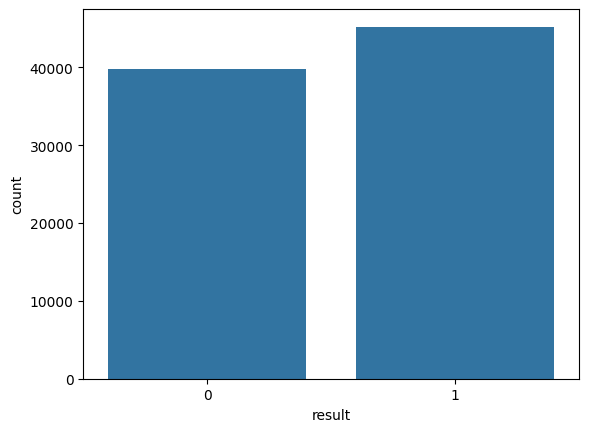

In [ ]:
sns.countplot(x='result',data=delivery_df)

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets','total_runs_x','cur_run_rate',
                        'req_run_rate','result']].reset_index(drop=True)


final_df.head()


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
0,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975,0
1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424,0
2,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385,0
3,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448,0
4,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957,0


In [ ]:
final_df.shape

(85079, 10)

In [ ]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,832
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
cur_run_rate,0
req_run_rate,5
result,0


In [ ]:
final_df = final_df.dropna()

final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
cur_run_rate,0
req_run_rate,0
result,0


In [ ]:
final_df.shape

(84242, 10)

In [ ]:
final_df = final_df[final_df['balls_left']!=0]

In [ ]:
final_df.shape

(83962, 10)

<Axes: >

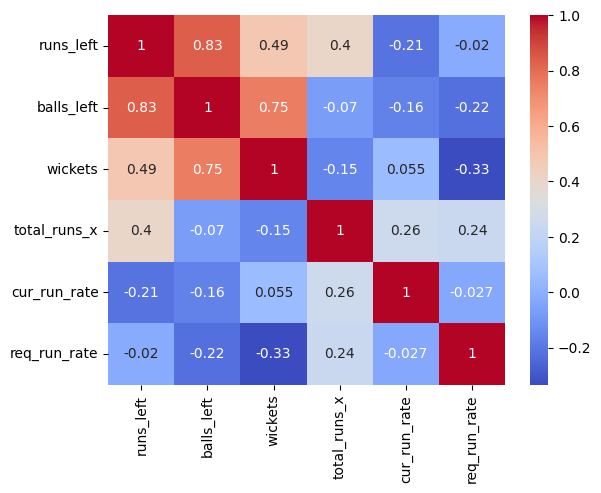

In [ ]:
numerical_cols=['runs_left','balls_left','wickets','total_runs_x','cur_run_rate','req_run_rate']
numeric_df=final_df[numerical_cols]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')





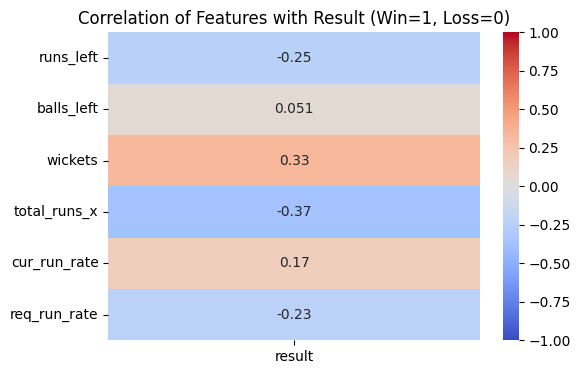

In [ ]:

numeric_df = final_df[numerical_cols + ['result']]

corr_matrix = numeric_df.corr()

corr_with_result = corr_matrix[['result']].drop('result')

plt.figure(figsize=(6, 4))
sns.heatmap(corr_with_result, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Result (Win=1, Loss=0)")
plt.show()

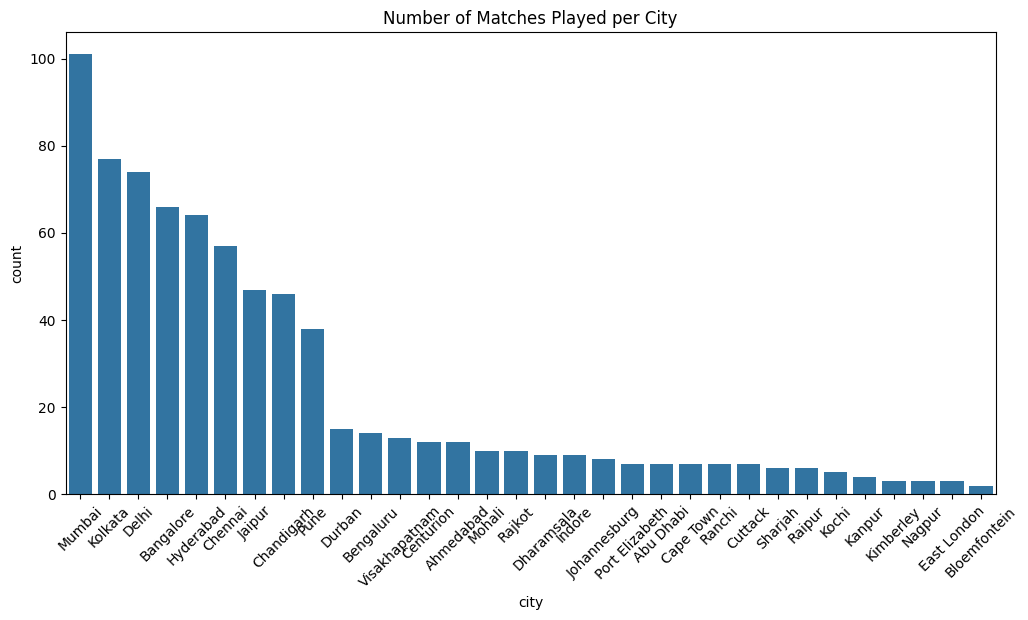

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=matches, x='city', order=matches['city'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Matches Played per City")
plt.show()


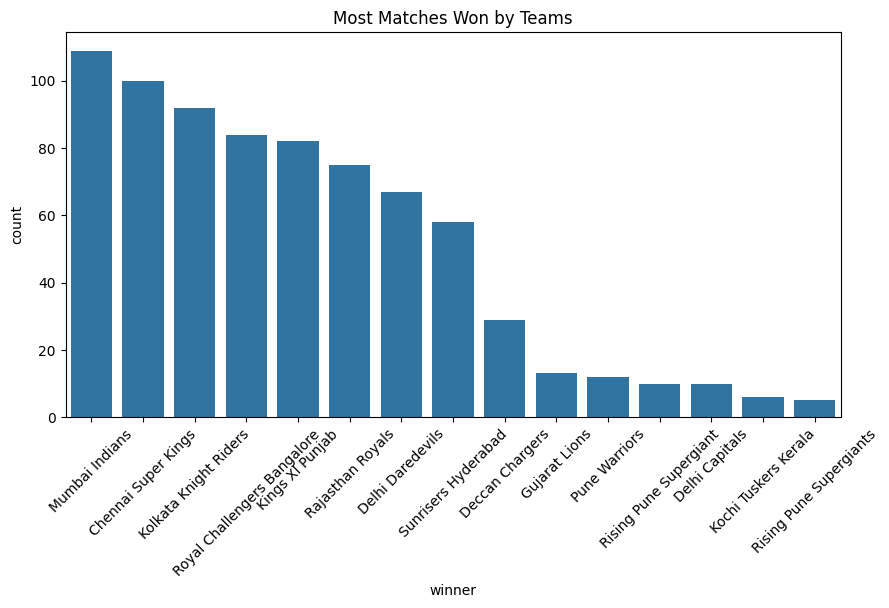

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=matches, x='winner', order=matches['winner'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Most Matches Won by Teams")
plt.show()


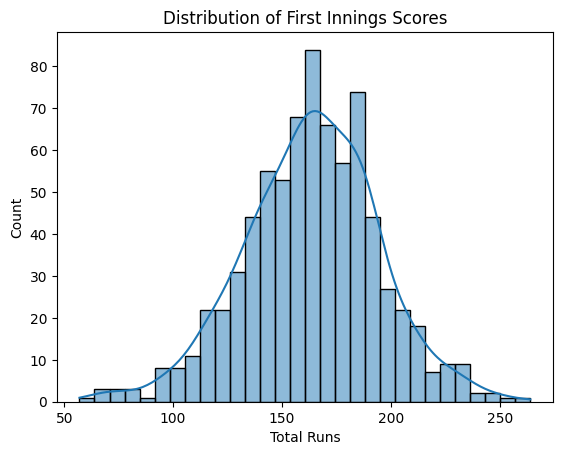

In [ ]:
sns.histplot(totalrun_df['total_runs'], bins=30, kde=True)
plt.title("Distribution of First Innings Scores")
plt.xlabel("Total Runs")
plt.show()


In [ ]:
final_df = final_df.dropna()
final_df = final_df[final_df['balls_left'] != 0]


# Modelling

## Encoding ,Splitting and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# One-Hot Encode categorical features
final_encoded_df = pd.get_dummies(final_df, columns=['batting_team', 'bowling_team', 'city'], drop_first=True)

#Split into features and target
X = final_encoded_df.drop(columns=['result'])
y = final_encoded_df['result']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features (important for SVM, ANN,Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def print_prediction_probability(model, X_test, index):
    """
    Prints the probability of winning and losing for a given test instance.

    Parameters:
    - model: Trained classification model (e.g., LogisticRegression)
    - X_test: Feature set of test data
    - index: Index of the test instance to check
    """
    proba = model.predict_proba(X_test)[index]
    print(f"Test Instance #{index}")
    print(f"🔴 Probability of Losing (Class 0): {proba[0]*100:.4f} %")
    print(f"🟢 Probability of Winning (Class 1): {proba[1]*100:.4f} %")


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
# Logistic Regression
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train_scaled, y_train)

# Make predictions
log_preds = log_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:",accuracy_score(y_test, log_preds))


Logistic Regression Accuracy: 0.8137319121062347


In [ ]:
print_prediction_probability(log_model,X_test_scaled,410)

Test Instance #410
🔴 Probability of Losing (Class 0): 14.1100 %
🟢 Probability of Winning (Class 1): 85.8900 %


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

Decision Tree Accuracy: 0.988626213303162


In [ ]:
print_prediction_probability(dt_model,X_test,410)

Test Instance #410
🔴 Probability of Losing (Class 0): 0.0000 %
🟢 Probability of Winning (Class 1): 100.0000 %


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.9985708330852141


In [ ]:
print_prediction_probability(rf_model,X_test,410)

Test Instance #410
🔴 Probability of Losing (Class 0): 5.0000 %
🟢 Probability of Winning (Class 1): 95.0000 %


## SVM Classifier (with probabilities)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Train the SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [ ]:
# Predict and calculate accuracy
svm_preds = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, svm_preds)
print(f"\n SVM Accuracy: {accuracy:2f}%")


 SVM Accuracy: 0.960877%


In [ ]:
print_prediction_probability(svm_model,X_test_scaled,410)

Test Instance #410
🔴 Probability of Losing (Class 0): 7.3713 %
🟢 Probability of Winning (Class 1): 92.6287 %


#XGBoost Classifier (with probabilities)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict and calculate accuracy
xgb_preds = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, xgb_preds)
print(f"\n XGBoost Accuracy: {accuracy}")


 XGBoost Accuracy: 0.9977371523849223


In [ ]:
print_prediction_probability(xgb_model,X_test,410)

Test Instance #410
🔴 Probability of Losing (Class 0): 7.0185 %
🟢 Probability of Winning (Class 1): 92.9815 %


### ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical




In [ ]:
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model_ann.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=64)


Epoch 1/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8225 - loss: 0.3912 - val_accuracy: 0.9399 - val_loss: 0.1585
Epoch 2/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9498 - loss: 0.1339 - val_accuracy: 0.9659 - val_loss: 0.0872
Epoch 3/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9699 - loss: 0.0810 - val_accuracy: 0.9727 - val_loss: 0.0713
Epoch 4/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9783 - loss: 0.0603 - val_accuracy: 0.9812 - val_loss: 0.0522
Epoch 5/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0483 - val_accuracy: 0.9806 - val_loss: 0.0482
Epoch 6/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9841 - loss: 0.0430 - val_accuracy: 0.9844 - val_loss: 0.0404
Epoch 7/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9859 - loss: 0.0376 - val_accuracy: 0.9810 - val_loss: 0.0468
Epoch 8/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9877 - loss: 0.0353 - val_accuracy: 0.

In [ ]:
def print_ann_prediction_probability(model, X_test, index):
    """
    Prints the probability of winning and losing for a given test instance.

    Parameters:
    - model: Trained Keras model
    - X_test: Feature set of test data (must be preprocessed & scaled)
    - index: Index of the test instance to check
    """
    # Make sure input is 2D (Keras expects batches)
    sample = X_test[index].reshape(1, -1)

    # Get prediction
    prob_win = model.predict(sample, verbose=0)[0][0]
    prob_lose = 1 - prob_win

    print(f"Test Instance #{index}")
    print(f"🔴 Probability of Losing (Class 0): {prob_lose*100:.4f} %")
    print(f"🟢 Probability of Winning (Class 1): {prob_win*100:.4f} %")


In [ ]:
print_ann_prediction_probability(model_ann, X_test_scaled, 410)

Test Instance #410
🔴 Probability of Losing (Class 0): 0.0085 %
🟢 Probability of Winning (Class 1): 99.9915 %


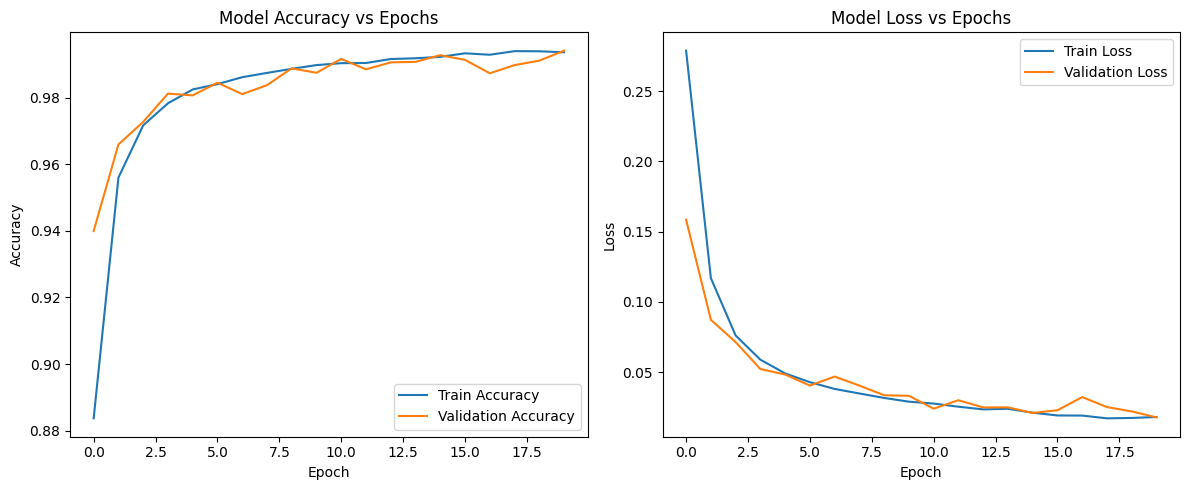

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Deployment

### Pickling Models and Scaler

In [ ]:
import pickle
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(log_model, f)


In [ ]:
from tensorflow.keras.models import load_model
model_ann.save("model_ann.h5")


In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
with open("encoded_columns.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)


In [ ]:
with open("svc_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

### Streamlit

In [ ]:
! pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 123.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
%%writefile app1.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Load models and artifacts
with open("/content/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/encoded_columns.pkl", "rb") as f:
    encoded_columns = pickle.load(f)

with open("/content/logistic_model.pkl", "rb") as f:
    logistic_model = pickle.load(f)

with open("/content/svc_model.pkl", "rb") as f:
    svc_model = pickle.load(f)

ann_model = load_model("/content/model_ann.h5")

# Title
st.title("🏏 IPL Win Predictor")

# Input form
teams = ['Chennai Super Kings', 'Delhi Capitals', 'Kolkata Knight Riders', 'Mumbai Indians',
         'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']

city_list = ['Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Chennai', 'Jaipur', 'Hyderabad']

batting_team = st.selectbox("Batting Team", teams)
bowling_team = st.selectbox("Bowling Team", teams)
city = st.selectbox("Match City", city_list)

target = st.number_input("Target Score", min_value=1)
score = st.number_input("Current Score", min_value=0)
overs = st.number_input("Overs Completed", min_value=0.0, max_value=20.0, step=0.1)
wickets = st.number_input("Wickets Fallen", min_value=0, max_value=10)

model_option = st.selectbox("Select Model", ["Logistic Regression", "SVC", "ANN"])

# Predict button
if st.button("Predict Win Probability"):

    # Compute features
    runs_left = target - score
    balls_left = int(120 - (overs * 6))
    wickets_left = 10 - wickets
    crr = score / overs if overs > 0 else 0
    rrr = (runs_left * 6 / balls_left) if balls_left > 0 else 0

    # Data preparation
    input_dict = {
        'batting_team': batting_team,
        'bowling_team': bowling_team,
        'city': city,
        'runs_left': runs_left,
        'balls_left': balls_left,
        'wickets_left': wickets_left,
        'total_runs_x': target,
        'crr': crr,
        'rrr': rrr
    }

    input_df = pd.DataFrame([input_dict])

    # One-hot encoding to match training
    input_encoded = pd.get_dummies(input_df)
    input_encoded = input_encoded.reindex(columns=encoded_columns, fill_value=0)

    # Scale
    input_scaled = scaler.transform(input_encoded)

    # Prediction
    if model_option == "Logistic Regression":
        prob = logistic_model.predict_proba(input_scaled)[0][1]

    elif model_option == "SVC":
        prob = svc_model.predict_proba(input_scaled)[0][1]

    elif model_option == "ANN":
        prob = ann_model.predict(input_scaled)[0][0]

    lossprob = 1 - prob
    winprob = prob

    # Display results
    st.markdown("### 🏆 Prediction Results")
    st.header(f" {batting_team} - {round(winprob * 100)}%")
    st.header(f"{bowling_team} - {round(lossprob * 100)}%")



Overwriting app1.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com


34.145.24.196


In [ ]:
! streamlit run app1.py & npx localtunnel --port 8501




⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.24.196:8501

⠴your url is: https://tame-jobs-go.loca.lt
2025-06-07 13:40:21.133279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749303621.174054    6993 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749303621.185252    6993 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-07 13:40:25.187558: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0